In [129]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt; plt.rcdefaults() 
import pandas.plotting as scatter_matrix 
import ast
from wordcloud import WordCloud, STOPWORDS 
import pygal
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
df= pd.read_csv(r"C:\Users\diyas\Downloads\MasterDatasetTemp_Preprocessed_Anonymized_small.csv") 

In [24]:
#remove unnneccesary columns
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'USN'])

In [5]:
df.head()

,10thPercentage,10thMarks,12thPercentage,Branch,CGPA,CourseName,CourseGrade,CompanyName_New,CTC,TierLevel,...,Publication,ResearchDomain,ScholarshipsKey,SoftwareTools,VolunteeringWork,WorkshopsOrg,WorkshopsDomain,AwardsNLPkey,ExternalCertificatesKey,ExternalCertificatesDomain
0,96.0,96.000000,90.0,cse,9.68,"['introduction to computing using python ', 'i...","['s', 's', 's', 'a', 's', 's', 's', 's', 's', ...",walmart labs,18.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cryptography##
1,9.7,92.150000,97.6,cse,8.83,"['introduction to computing using python', 'in...","['c', 'a', 'b', 'a', 's', 'a', 'b', 'a', 'a', ...",themathcompany,4.50,2.0,...,NaN,NaN,cnr##,NaN,NaN,NaN,NaN,distinction award##,NaN,NaN
2,9.7,92.150000,97.6,cse,8.83,"['introduction to computing using python', 'in...","['c', 'a', 'b', 'a', 's', 'a', 'b', 'a', 'a', ...",nxp semiconductors,12.15,1.0,...,NaN,NaN,cnr##,NaN,NaN,NaN,NaN,distinction award##,NaN,NaN
3,95.0,95.000000,96.0,cse,9.27,"['introduction to computing using python', 'in...","['b', 's', 'a', 'a', 's', 's', 'a', 'a', 'a', ...",intuit,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,93.386967,94.0,cse,8.95,"['introduction to computing using python', 'in...","['b', 's', 'a', 'a', 'a', 's', 'a', 'b', 'a', ...",citrix,23.42,1.0,...,NaN,NaN,mrd##,flask##spring##mysql##mongodb,NaN,NaN,NaN,alcoding##iisc##,NaN,NaN


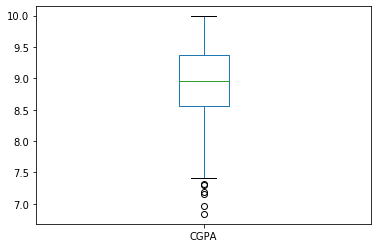

8.869895833333338

In [6]:
#anolmolies for cgpa
#boxplot
path2 = pd.DataFrame(df.CGPA) 
ax = path2.plot.box() 
plt.show() 
mean=np.mean(df["CGPA"])
mean

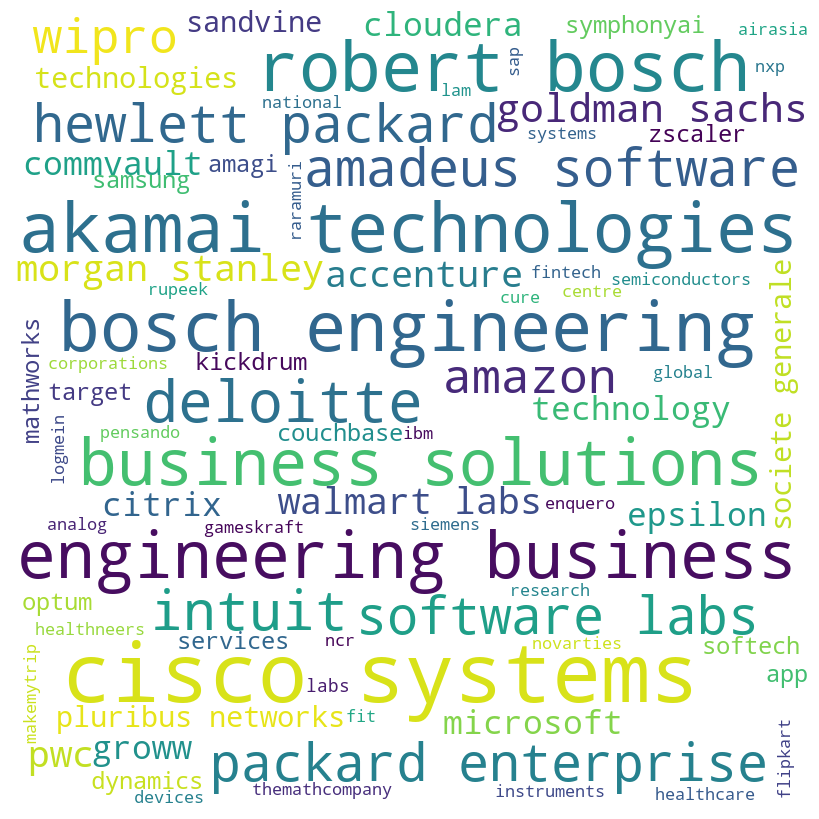

In [10]:
#wordcloud for Company Names
for i in ['CompanyName_New']: 
    df[i] = df[i].replace(np.nan," ") 
    df[i]= df[i].replace("nan"," ")
    df[i]= df[i].replace("NaN"," ")

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.CompanyName_New: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002030FFC4EF0>]],
      dtype=object)

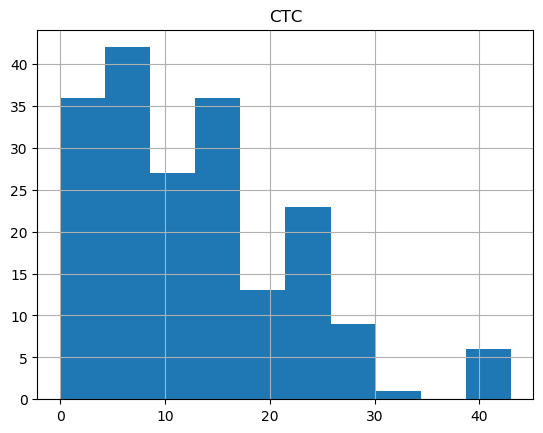

In [12]:
# CTC IN LPA
df["CTC"] = df["CTC"].fillna(0).astype(int)
df.hist(column=["CTC"])

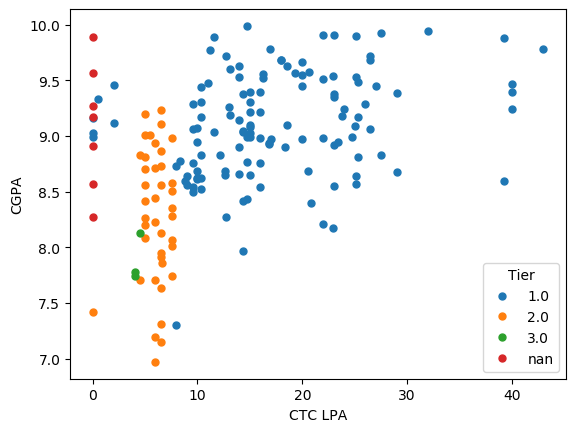

In [192]:
#Relationship between CTC and CGPA
#plt.scatter(df.CTC, df.CGPA, c=df.TierLevel)
groups = df.groupby('TierLevel')
for name, group in groups:
    plt.plot(group.CTC, group.CGPA, marker='o', linestyle=' ', markersize=5, label=name)
    plt.xlabel("CTC LPA")
    plt.ylabel("CGPA")
plt.legend(title="Tier")

In [187]:
df3.TierLevel
df['TierLevel'] = df['TierLevel'].replace(np.nan, 0)
df.TierLevel.value_counts()

1.0    133
2.0     40
nan     17
3.0      3
Name: TierLevel, dtype: int64

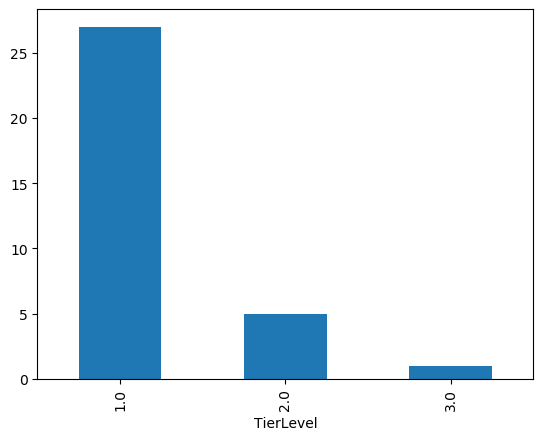

In [14]:
#Tier level distribution
df.groupby('TierLevel')['CTC'].nunique().plot(kind='bar')
plt.show()

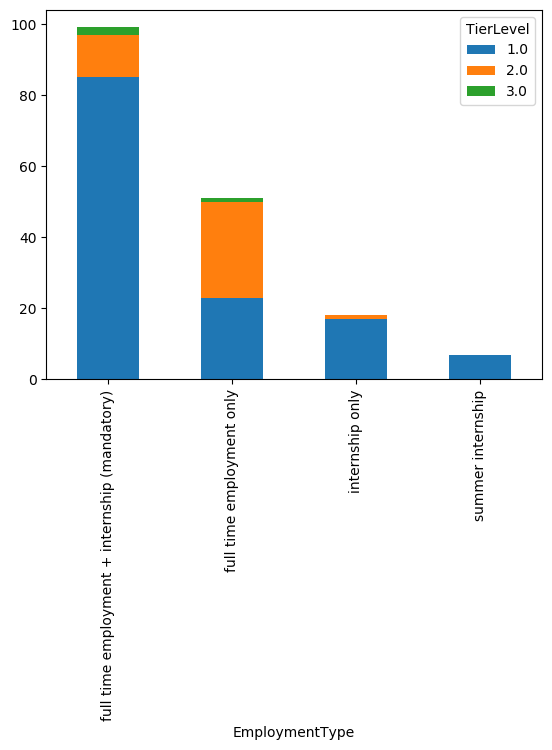

In [17]:
df.groupby(['EmploymentType','TierLevel'])['EmploymentType'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [15]:
df.columns

Index(['10thPercentage', '10thMarks', '12thPercentage', 'Branch', 'CGPA',
       'CourseName', 'CourseGrade', 'CompanyName_New', 'CTC', 'TierLevel',
       'CoCurricularActivities', 'EmploymentType', 'EventsParticipated',
       'GeneralSkills', 'Languages', 'MinorAttended', 'NoofInternships',
       'InternshipProjectDomain', 'InternshipCompany', 'NoofProjects',
       'ProjectDetailDomain', 'ProgLanguages', 'Publication', 'ResearchDomain',
       'ScholarshipsKey', 'SoftwareTools', 'VolunteeringWork', 'WorkshopsOrg',
       'WorkshopsDomain', 'AwardsNLPkey', 'ExternalCertificatesKey',
       'ExternalCertificatesDomain'],
      dtype='object')

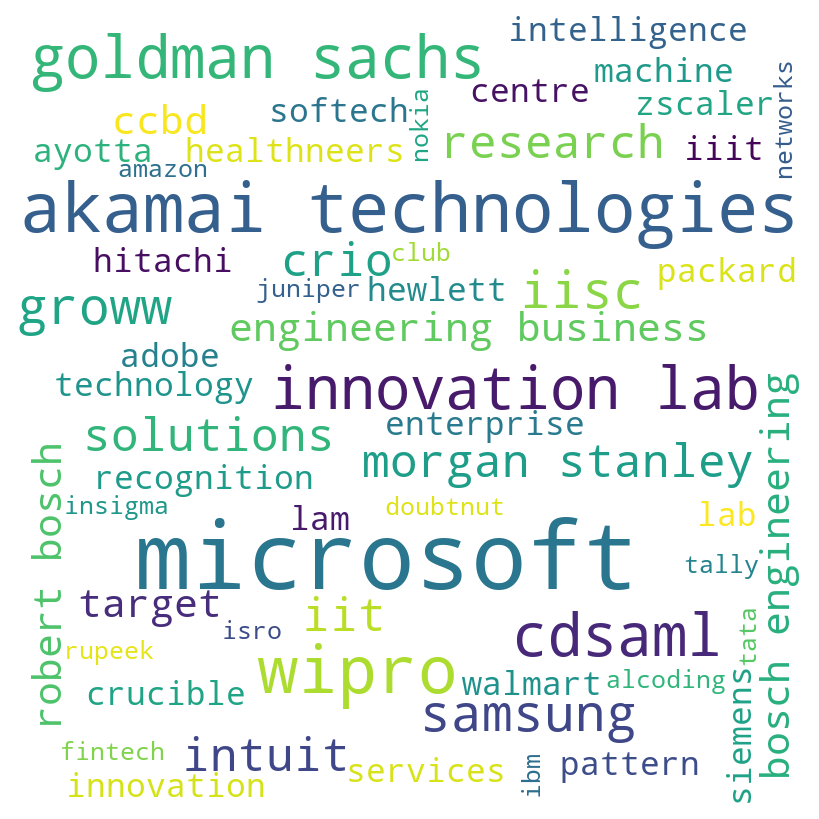

In [18]:
#wordcloud for Internship Names
for i in ['InternshipCompany']: 
    df[i] = df[i].replace(np.nan," ") 
    df[i]= df[i].replace("nan"," ")
    df[i]= df[i].replace("NaN"," ")

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.InternshipCompany: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [26]:
#making into a columns into a list
df['ExternalCertificatesKey']=df['ExternalCertificatesKey'].str.split('##')
df['ExternalCertificatesDomain']=df['ExternalCertificatesDomain'].str.split('##')
df['AwardsNLPkey']=df['AwardsNLPkey'].str.split('##')
df['WorkshopsDomain']=df['WorkshopsDomain'].str.split('##')
df['WorkshopsOrg']=df['WorkshopsOrg'].str.split('##')
df['SoftwareTools']=df['SoftwareTools'].str.split('##')
df['ProgLanguages']=df['ProgLanguages'].str.split('##')
df['InternshipProjectDomain']=df['InternshipProjectDomain'].str.split('##')
df['ResearchDomain']=df['ResearchDomain'].str.split('##')
df['ProjectDetailDomain']=df['ProjectDetailDomain'].str.split('##')
df['InternshipCompany']=df['InternshipCompany'].str.split('##')
df['ScholarshipsKey']=df['ScholarshipsKey'].str.split('##')
df['Publication']=df['Publication'].str.split('##')
df['Languages']=df['Languages'].str.split('##')

In [55]:
l=df['Languages'].value_counts()

In [70]:
df['Languages'][5][1]

'hindi'

In [83]:
lang={}
for i,k in df.iterrows():
    n=[]
    if(df.Languages[i]!='' and type(df.Languages[i])!=float):
        for j in df.Languages[i]:
            if j not in l and type(j)!=float:
                if j not in lang:
                    lang[j] = 1
                else:
                    lang[j] =lang[j] + 1

In [100]:
#project domain count
proj={}
for i,k in df.iterrows():
    n=[]
    if(df.ProjectDetailDomain[i]!='' and type(df.ProjectDetailDomain[i])!=float):
        for j in df.ProjectDetailDomain[i]:
            if j not in l and type(j)!=float:
                if j not in proj:
                    proj[j] = 1
                else:
                    proj[j] =proj[j] + 1
        

Text(0.5, 1.0, 'Project domains of placed students')

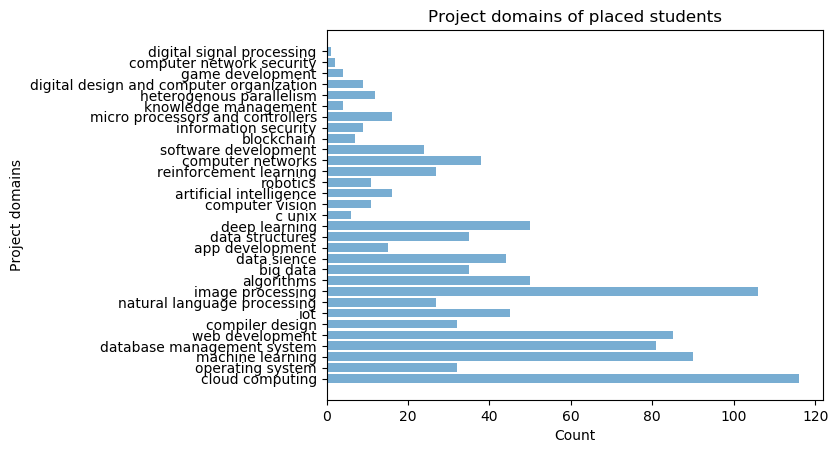

In [110]:
plt.barh(list(proj.keys()),list(proj.values()), align='center', alpha=0.6) 
plt.xlabel('Count') 
plt.ylabel('Project domains') 
plt.title('Project domains of placed students') 

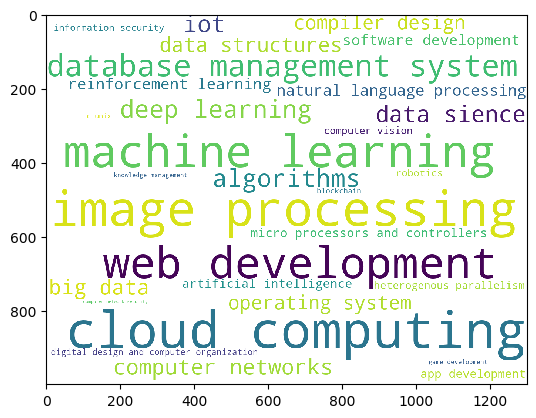

In [139]:
wc = WordCloud(background_color="white",width=1300,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(proj)
plt.imshow(wc)

In [ ]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(proj)
plt.imshow(wc)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002031017D588>]],
      dtype=object)

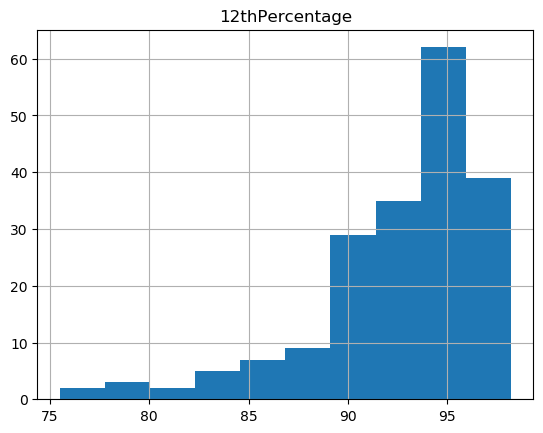

In [94]:
df.hist(column='12thPercentage')

Text(0.5, 1.0, 'Project domains of placed students')

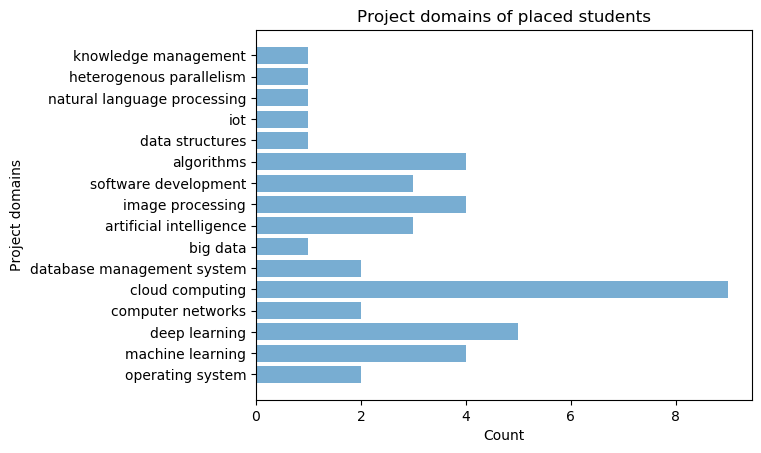

In [123]:
#research domain count
research={}
for i,k in df.iterrows():
    if(df.ResearchDomain[i]!='' and type(df.ResearchDomain[i])!=float):
        for j in df.ResearchDomain[i]:
            if j not in l and type(j)!=float:
                if j not in research:
                    research[j] = 1
                else:
                    research[j] =research[j] + 1
                    
plt.barh(list(research.keys()),list(research.values()), align='center', alpha=0.6) 
plt.xlabel('Count') 
plt.ylabel('Research domains') 
plt.title('Research domains of placed students') 


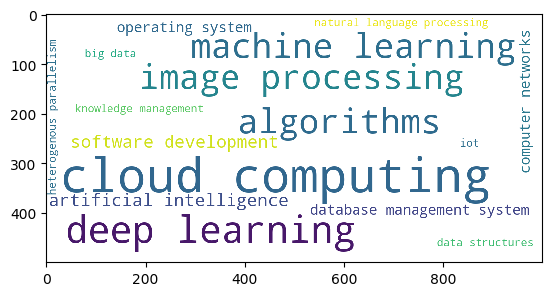

In [136]:
wc = WordCloud(background_color="white",width=1000,height=500, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(research)
plt.imshow(wc)

In [126]:
df['Publication'].value_counts()

[ieee, ]    3
Name: Publication, dtype: int64

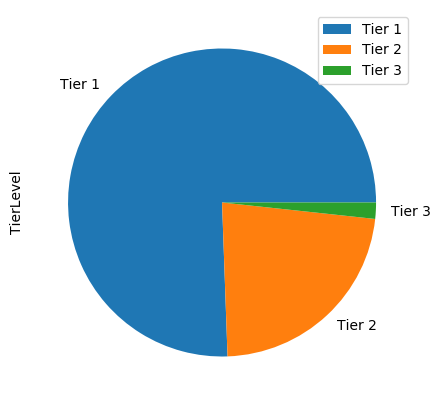

In [128]:
#piechart for tier 
df["TierLevel"] = df["TierLevel"].astype(str)
p1=df["TierLevel"].str.count("1").sum() 
p2=df["TierLevel"].str.count("2").sum() 
p3=df["TierLevel"].str.count("3").sum() 
path3= pd.DataFrame({'TierLevel': [p1,p2,p3]},index=['Tier 1','Tier 2','Tier 3']) 
plot = path3.plot.pie(y='TierLevel', figsize=(5,5)) 
plt.show()

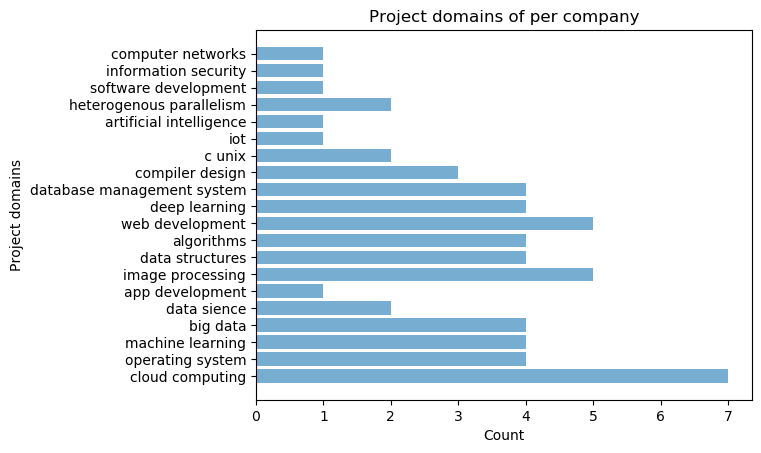

In [145]:
#Top project domains based on company name:
def getproj(comp):
    dfc=df[df['CompanyName_New'] == comp]
    proj={}
    for i,k in dfc.iterrows():
        n=[]
        if(dfc.ProjectDetailDomain[i]!='' and type(dfc.ProjectDetailDomain[i])!=float):
            for j in dfc.ProjectDetailDomain[i]:
                if j not in l and type(j)!=float:
                    if j not in proj:
                        proj[j] = 1
                    else:
                        proj[j] =proj[j] + 1
    plt.barh(list(proj.keys()),list(proj.values()), align='center', alpha=0.6) 
    plt.xlabel('Count') 
    plt.ylabel('Project domains') 
    plt.title('Project domains of per company') 
    
#input company name
name="intuit"
getproj(name)

In [ ]:
# CGPA, 10th percentage and 12th Percentage based on company


In [ ]:
# internship companies based on company

Text(0.5, 1.0, 'Top Software Tools for Placed students')

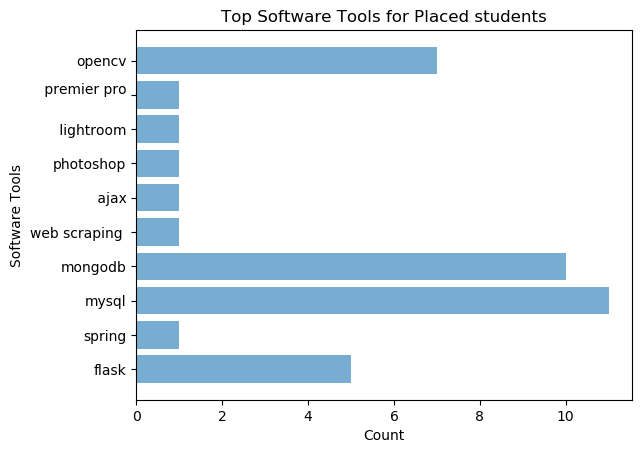

In [198]:
tools={}
for i,k in df.iterrows():
    n=[]
    if(df.SoftwareTools[i]!='' and type(df.SoftwareTools[i])!=float):
        for j in df.SoftwareTools[i]:
            if type(j)!=float:
                if j not in tools:
                    tools[j] = 1
                else:
                    tools[j] =tools[j] + 1
plt.barh(list(tools.keys())[0:10],list(tools.values())[0:10], align='center', alpha=0.6) 
plt.xlabel('Count') 
plt.ylabel('Software Tools') 
plt.title('Top Software Tools for Placed students')  

Text(0.5, 1.0, 'Top Programming Languages for Placed students')

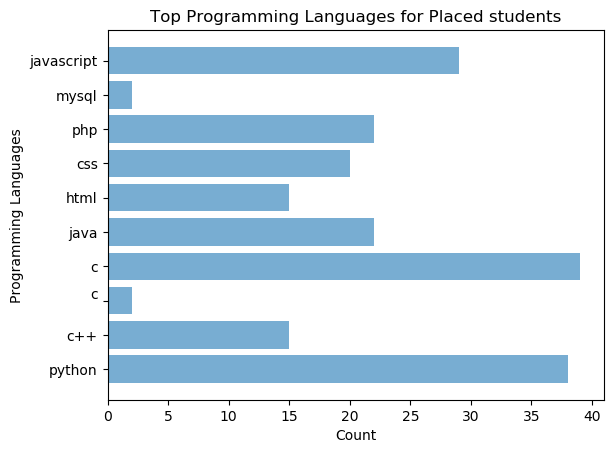

In [206]:
p={}
for i,k in df.iterrows():
    n=[]
    if(df.ProgLanguages[i]!='' and type(df.ProgLanguages[i])!=float):
        for j in df.ProgLanguages[i]:
            if type(j)!=float:
                if j not in p:
                    p[j] = 1
                else:
                    p[j] =p[j] + 1
plt.barh(list(p.keys())[0:10],list(p.values())[0:10], align='center', alpha=0.6) 
plt.xlabel('Count') 
plt.ylabel('Programming Languages') 
plt.title('Top Programming Languages for Placed students')  

([<matplotlib.patches.Wedge at 0x203190f25c0>,
 [Text(0.9169626164928313, 0.6076014811985081, 'python'),
  Text(0.18544959873613018, 1.0842547884739124, 'c++'),
  Text(-0.10149524385701295, 1.095307589435226, 'c\n'),
  Text(-0.7284590941148084, 0.8242253018449706, 'c'),
  Text(-1.0953075867625996, -0.10149527269922785, 'java'),
  Text(-0.8675066010018936, -0.6763374137352905, 'html'),
  Text(-0.39736573218118276, -1.0257194913269967, 'css'),
  Text(0.3010294016119515, -1.0580081754717923, 'php'),
  Text(0.662898197161407, -0.8778188766483417, 'mysql'),
  Text(0.9921134143599913, -0.4750904893248868, 'javascript')])

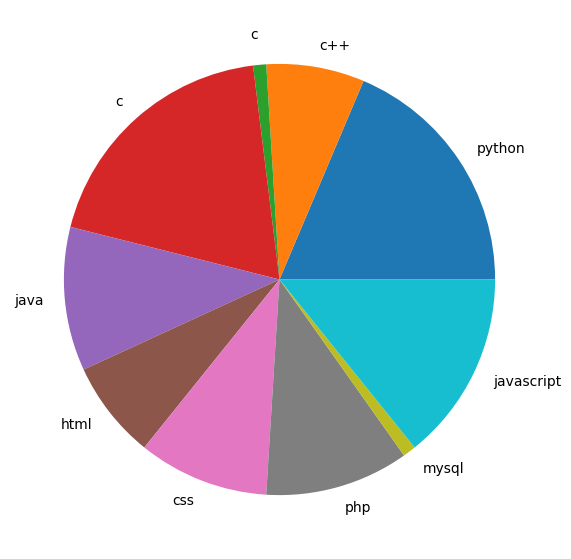

In [205]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(list(p.values())[0:10], labels = list(p.keys())[0:10]) 

In [214]:
s={}
for i,k in df.iterrows():
    n=[]
    if(df.ScholarshipsKey[i]!='' and type(df.ScholarshipsKey[i])!=float):
        for j in df.ScholarshipsKey[i]:
            if type(j)!=float:
                if j not in s:
                    s[j] = 1
                else:
                    s[j] =s[j] + 1
s.pop("")

97

([<matplotlib.patches.Wedge at 0x2031bb389e8>,
 [Text(-0.4703106027733101, 0.9943882224357878, 'cnr'),
  Text(0.13465174271913716, -1.0917274880585812, 'mrd'),
  Text(1.0444809986523405, -0.3450499144387807, 'distinction')])

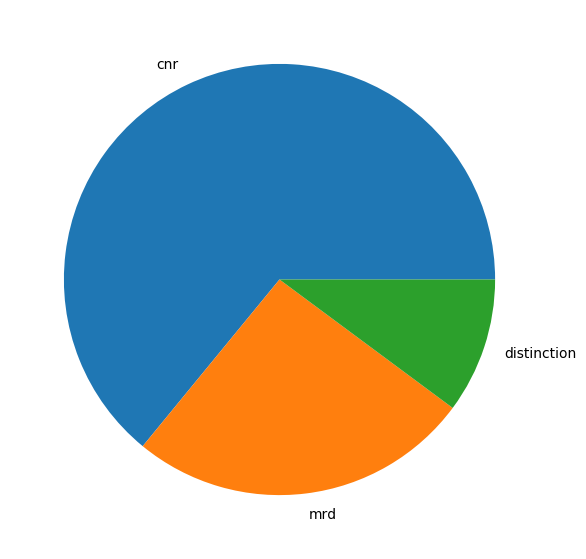

In [215]:
fig = plt.figure(figsize =(10, 7)) 
plt.pie(list(s.values())[0:3], labels = list(s.keys())[0:3])

Text(0.5, 1.0, 'Top External Certificates taken by Placed students')

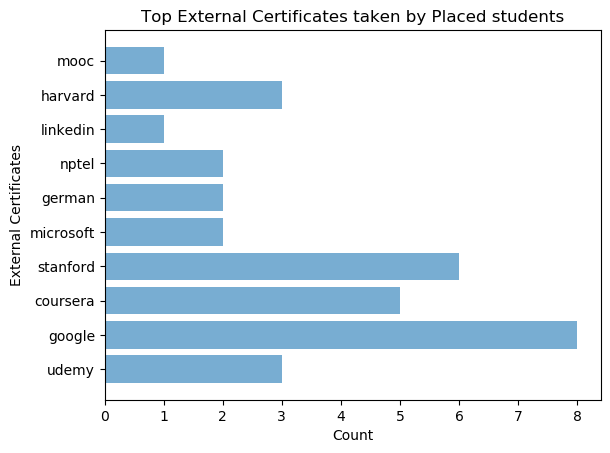

In [217]:
e={}
for i,k in df.iterrows():
    n=[]
    if(df.ExternalCertificatesKey[i]!='' and type(df.ExternalCertificatesKey[i])!=float):
        for j in df.ExternalCertificatesKey[i]:
            if type(j)!=float:
                if j not in e:
                    e[j] = 1
                else:
                    e[j] =e[j] + 1
e.pop('')
plt.barh(list(e.keys())[0:10],list(e.values())[0:10], align='center', alpha=0.6) 
plt.xlabel('Count') 
plt.ylabel('External Certificates') 
plt.title('Top External Certificates taken by Placed students')  

In [213]:
s

{'cnr': 82, 'distinction': 13, 'mrd': 33}